In [130]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [174]:
learning_rate = 0.1

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    return tf.reduce_mean(tf.square(targets - predictions))

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
        gradient_w, gradient_b = tape.gradient(loss, [W, b])
        W.assign_sub(gradient_w * learning_rate)
        b.assign_sub(gradient_b * learning_rate)
        return loss

In [175]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

In [176]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [177]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1)), np.ones((num_samples_per_class, 1)))).astype(np.float32)

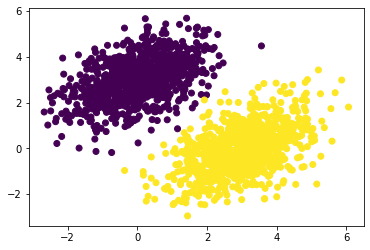

In [178]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [179]:
for step in range(40):
    loss = training_step(inputs, targets)
    print('Loss of', step + 1, '/', 40, ':', loss.numpy())

Loss of 1 / 40 : 1.0323836
Loss of 2 / 40 : 0.10648443
Loss of 3 / 40 : 0.08585263
Loss of 4 / 40 : 0.07945751
Loss of 5 / 40 : 0.07478282
Loss of 6 / 40 : 0.070604496
Loss of 7 / 40 : 0.06677824
Loss of 8 / 40 : 0.063265346
Loss of 9 / 40 : 0.060039297
Loss of 10 / 40 : 0.057076596
Loss of 11 / 40 : 0.054355722
Loss of 12 / 40 : 0.05185695
Loss of 13 / 40 : 0.049562138
Loss of 14 / 40 : 0.047454637
Loss of 15 / 40 : 0.045519166
Loss of 16 / 40 : 0.04374168
Loss of 17 / 40 : 0.042109285
Loss of 18 / 40 : 0.040610135
Loss of 19 / 40 : 0.039233353
Loss of 20 / 40 : 0.03796895
Loss of 21 / 40 : 0.03680776
Loss of 22 / 40 : 0.03574135
Loss of 23 / 40 : 0.034761988
Loss of 24 / 40 : 0.03386257
Loss of 25 / 40 : 0.033036567
Loss of 26 / 40 : 0.032277986
Loss of 27 / 40 : 0.03158132
Loss of 28 / 40 : 0.030941525
Loss of 29 / 40 : 0.030353954
Loss of 30 / 40 : 0.029814342
Loss of 31 / 40 : 0.029318776
Loss of 32 / 40 : 0.028863665
Loss of 33 / 40 : 0.028445698
Loss of 34 / 40 : 0.028061848
Los

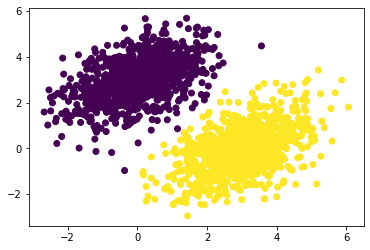

In [180]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

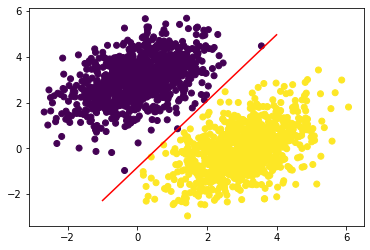

In [181]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()